### 变量相关系数热力图

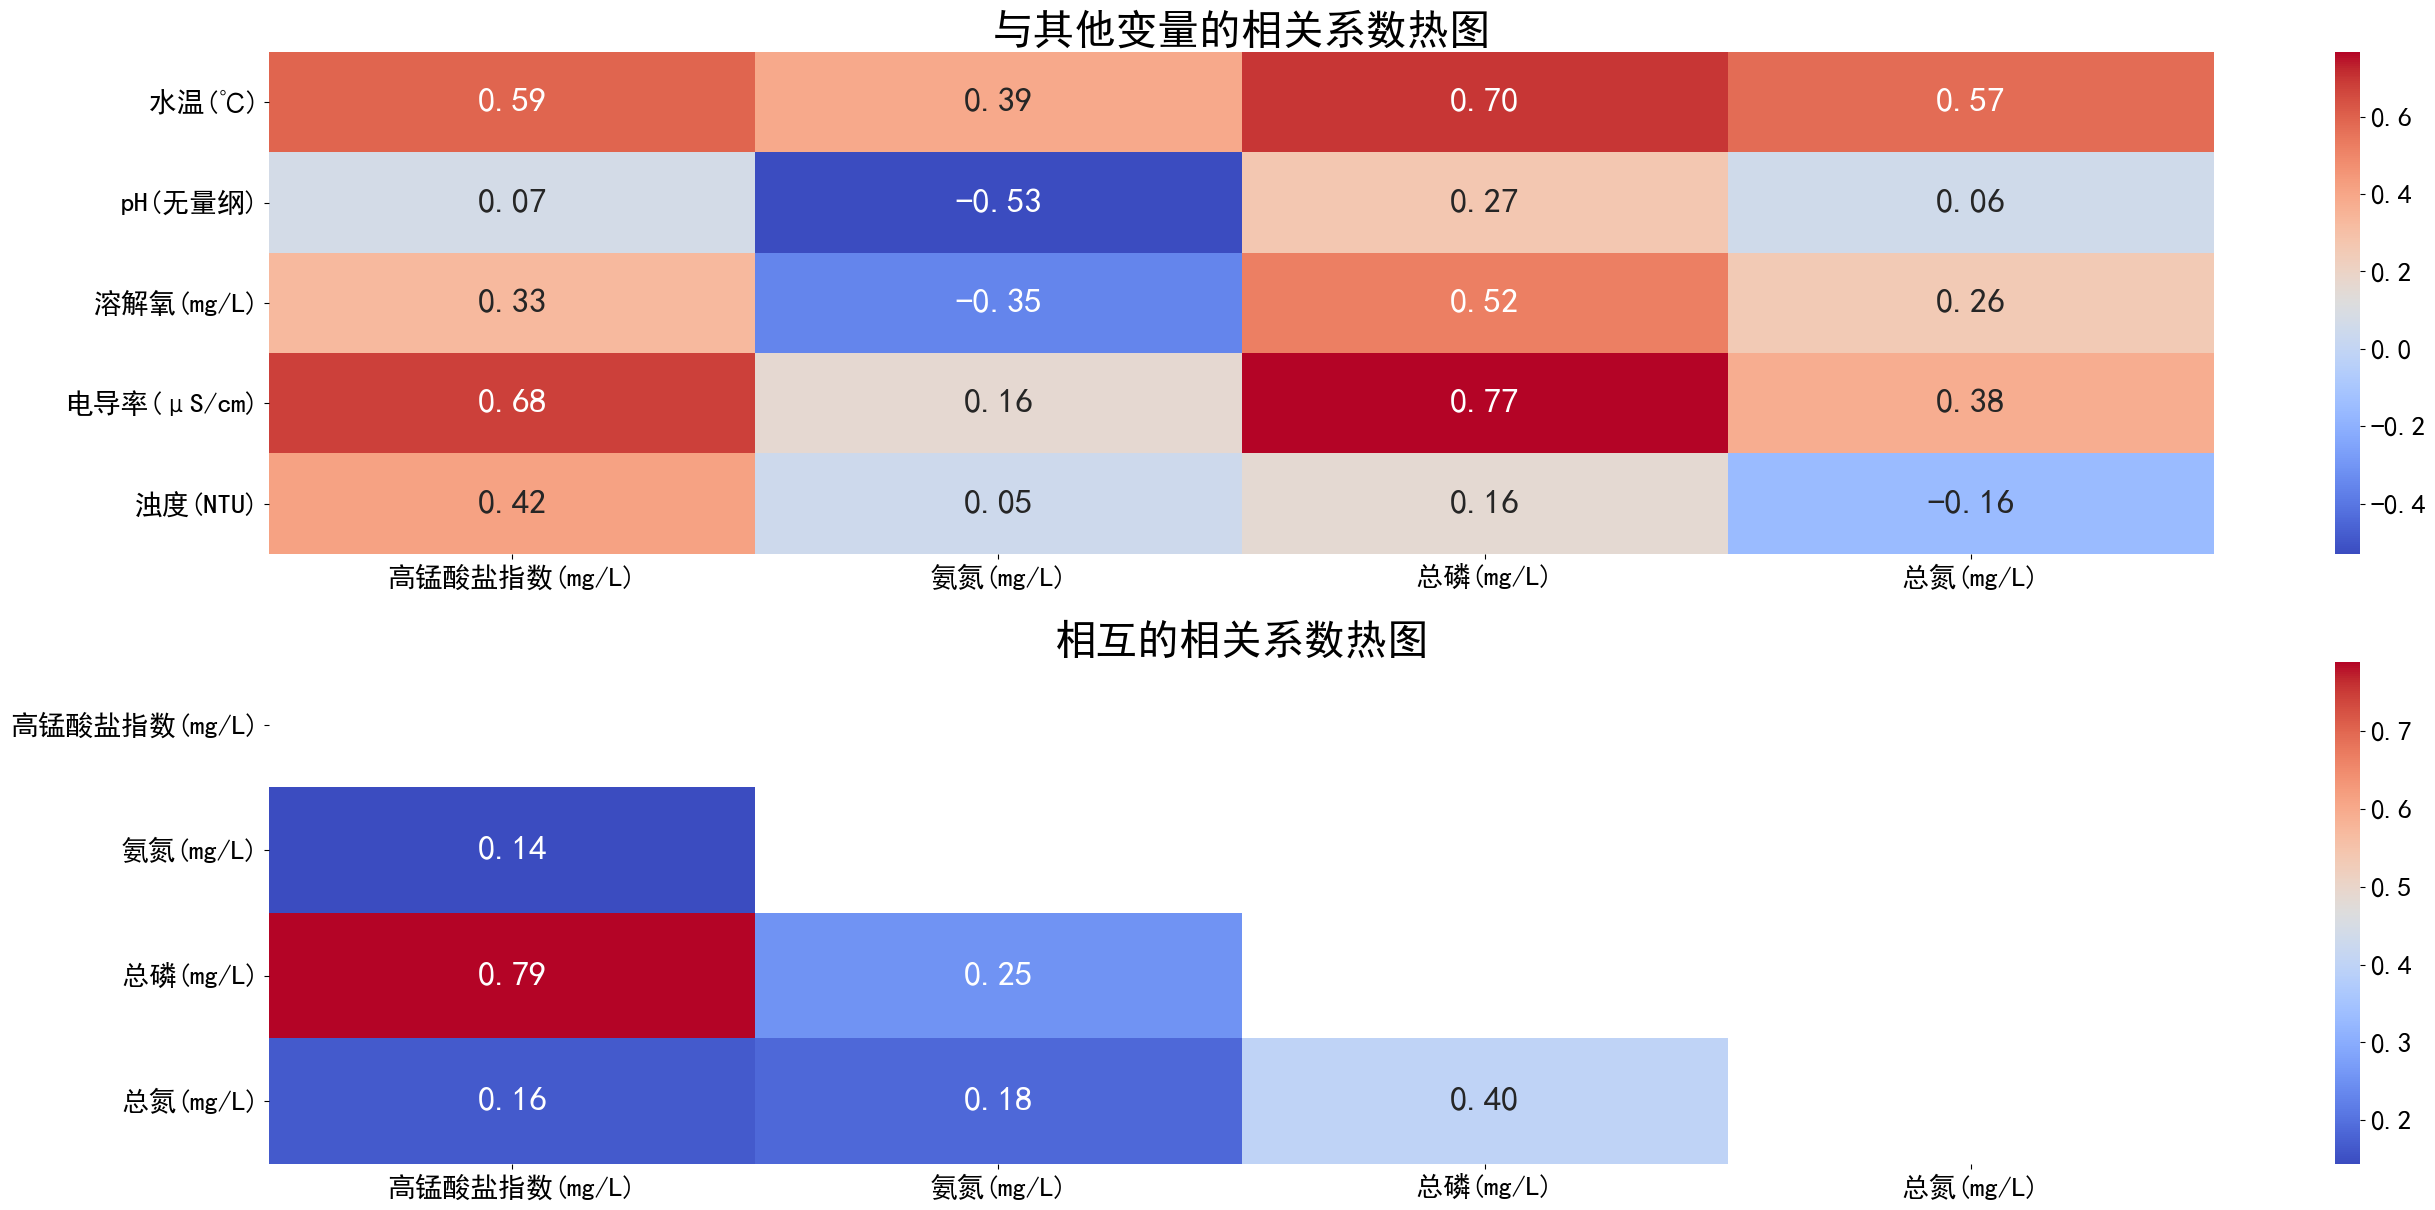

            高锰酸盐指数(mg/L)  氨氮(mg/L)  总磷(mg/L)  总氮(mg/L)
水温(℃)           0.590945  0.391394  0.697754  0.569897
pH(无量纲)         0.070878 -0.529866  0.269293  0.055486
溶解氧(mg/L)       0.327531 -0.352574  0.519767  0.255511
电导率(μS/cm)      0.679809  0.160553  0.767351  0.376019
浊度(NTU)         0.416024  0.046289  0.155017 -0.156458
              高锰酸盐指数(mg/L)  氨氮(mg/L)  总磷(mg/L)  总氮(mg/L)
高锰酸盐指数(mg/L)      1.000000  0.144135  0.788724  0.164347
氨氮(mg/L)          0.144135  1.000000  0.252549  0.184741
总磷(mg/L)          0.788724  0.252549  1.000000  0.400387
总氮(mg/L)          0.164347  0.184741  0.400387  1.000000


In [ ]:
#皮尔逊相关系数
pcorr_mx = ana_ff1.corr()
pcorr_mx1 = pcorr_mx[['高锰酸盐指数(mg/L)','氨氮(mg/L)','总磷(mg/L)','总氮(mg/L)']]
pcorr_mx2 = pcorr_mx1.loc[['水温(℃)','pH(无量纲)','溶解氧(mg/L)','电导率(μS/cm)','浊度(NTU)']]
pcorr_mx3 = pcorr_mx1.loc[['高锰酸盐指数(mg/L)','氨氮(mg/L)','总磷(mg/L)','总氮(mg/L)']]
#绘图
ttfsz = 30#标题字体大小
plt.rcParams['font.size'] = 20
plt.subplot(2 ,1 ,1)
sns.heatmap(pcorr_mx2, annot=True,annot_kws={'size':25}, cmap='coolwarm', fmt=".2f")
plt.title('与其他变量的相关系数热图', fontsize=ttfsz)
plt.subplot(2 ,1 ,2)
mask = np.triu(np.ones_like(pcorr_mx3, dtype=bool), k=1) 
np.fill_diagonal(mask, True) 
sns.heatmap(pcorr_mx3, mask=mask, annot=True,annot_kws={'size':25}, cmap='coolwarm', fmt=".2f")
plt.title('相互的相关系数热图', fontsize=ttfsz)

plt.tight_layout()
plt.show()
print(pcorr_mx2)
print(pcorr_mx3)


In [ ]:
#偏相关系数
pcorr_mx = ana_ff1.pcorr()
pcorr_mx1 = pcorr_mx[['高锰酸盐指数(mg/L)','氨氮(mg/L)','总磷(mg/L)','总氮(mg/L)']]
pcorr_mx2 = pcorr_mx1.loc[['水温(℃)','pH(无量纲)','溶解氧(mg/L)','电导率(μS/cm)','浊度(NTU)']]
pcorr_mx3 = pcorr_mx1.loc[['高锰酸盐指数(mg/L)','氨氮(mg/L)','总磷(mg/L)','总氮(mg/L)']]
#绘图
ttfsz = 30#标题字体大小
plt.rcParams['font.size'] = 20
plt.subplot(2 ,1 ,1)
sns.heatmap(pcorr_mx2, annot=True,annot_kws={'size':25}, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('与其他变量的相关系数热图', fontsize=ttfsz)
plt.subplot(2 ,1 ,2)
mask = np.triu(np.ones_like(pcorr_mx3, dtype=bool), k=1) 
np.fill_diagonal(mask, True) 
sns.heatmap(pcorr_mx3, mask=mask, annot=True,annot_kws={'size':25}, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('相互的相关系数热图', fontsize=ttfsz)

plt.tight_layout()
plt.show()
print(pcorr_mx2)
print(pcorr_mx3)


### 频数分布直方图

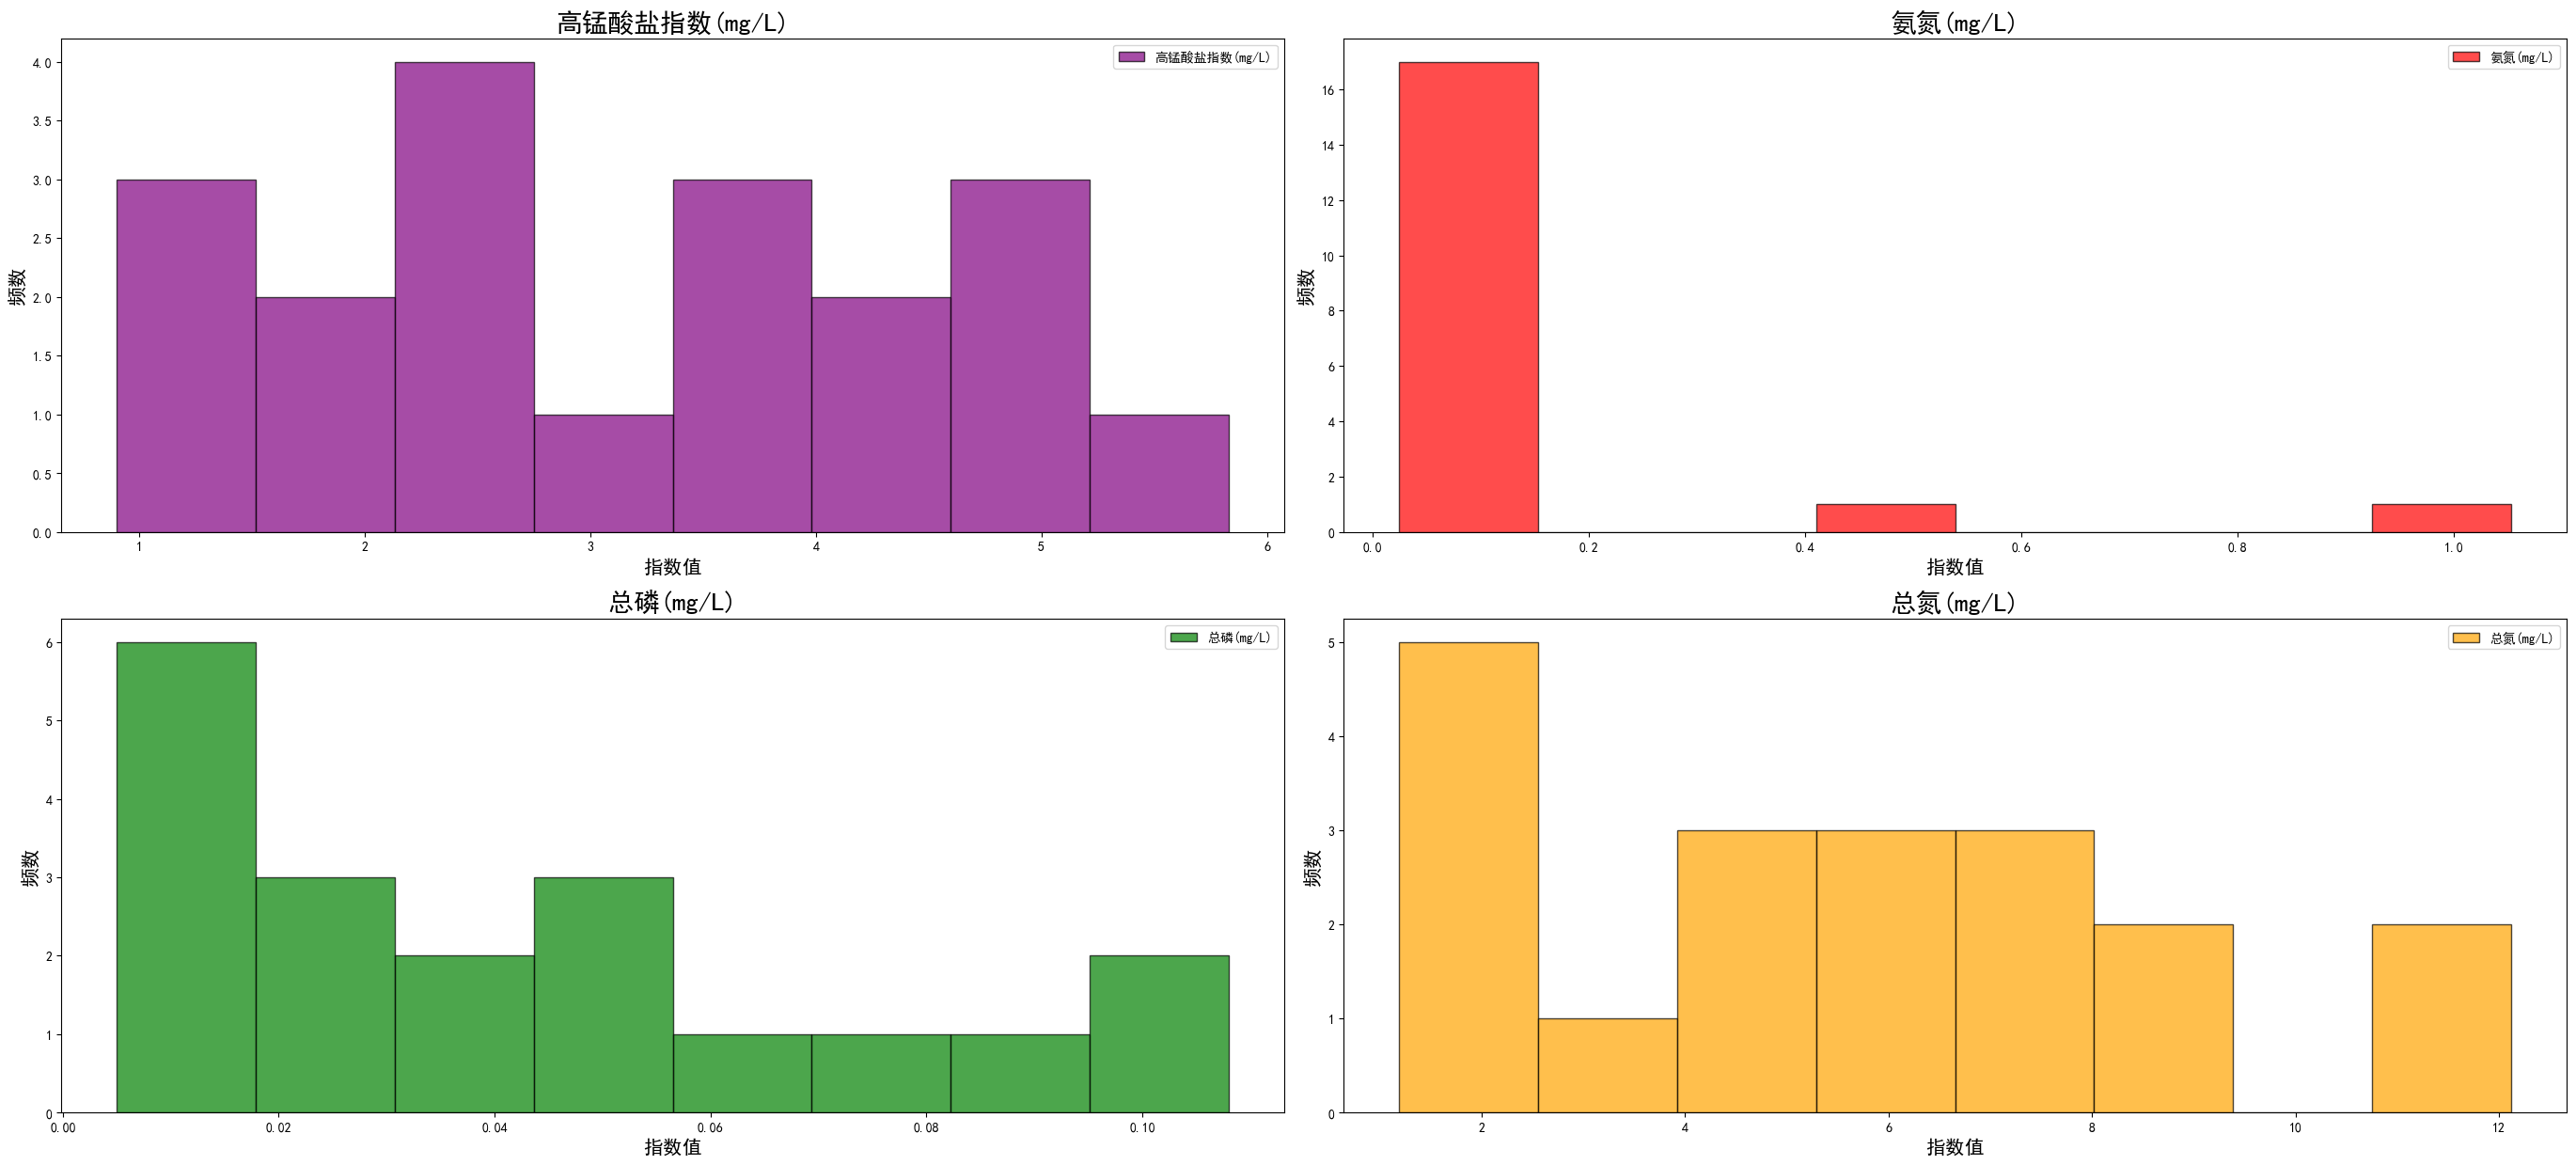

In [ ]:
plt.figure(figsize=[27.50, 12.50])  

# 遍历y_labels字典，为每个指标创建子图  
for i, (ylabel, color) in enumerate(y_labels.items(), start=1):  
    plt.subplot(2, 2, i)  # 根据循环的索引选择子图位置  
    # 绘制直方图，假设您想要30个直方条  
    plt.hist(excel[ylabel], bins=8, color=color, alpha=0.7, edgecolor='black', label=ylabel)  
    plt.title(ylabel,fontsize=20)  
    plt.xlabel('指数值',fontsize=15)  
    plt.ylabel('频数',fontsize=15)  
    # 显示图例  
    plt.legend()  

# 调整子图间距  
plt.tight_layout()  
  
# 显示图形  
plt.show()

### 地区分布折线图

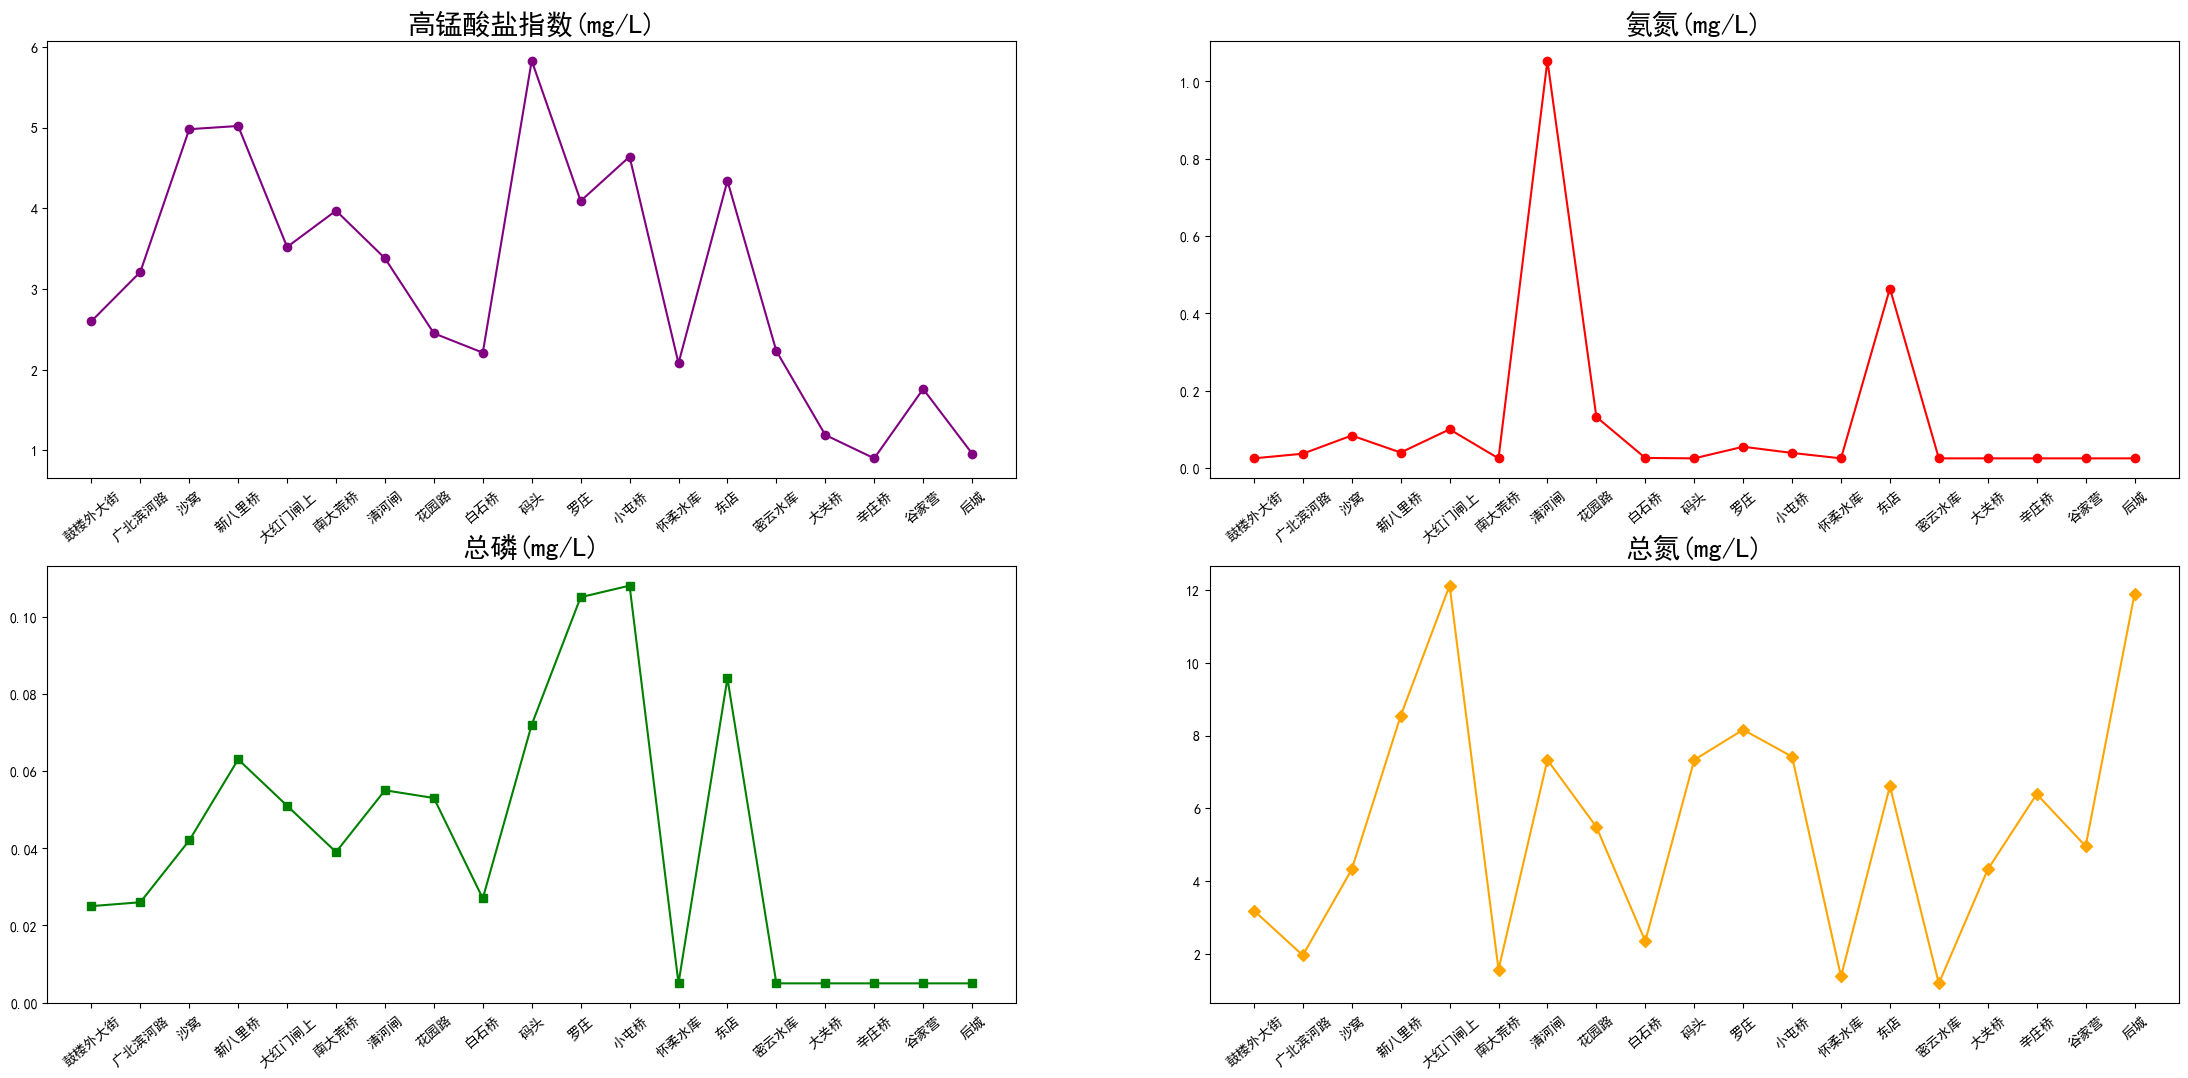

In [ ]:
plt.figure(figsize=[27.50, 12.50])  

# 遍历y_labels字典，为每个指标创建子图  
for i, (ylabel, color) in enumerate(y_labels.items(), start=1):  
    plt.subplot(2, 2, i)  # 根据循环的索引选择子图位置  
    plt.plot(x_label, excel[ylabel], marker='o' if i in [1, 2] else ('v' if i == 2 else ('s' if i == 3 else 'D')), c=color, label=ylabel)  
    plt.xticks(rotation=40, fontsize=10) 
    plt.title(ylabel,fontsize=20)  
    plt.gca().xaxis.set_tick_params(labelrotation=40)
   
# 显示图例  
# plt.legend()  
  
# 显示图形  
plt.show()

#### 一个半热图空白部分填充灰色的代码

In [ ]:
# 创建一个自定义的颜色映射，其中右上区域（包括对角线）的颜色为灰色，其余为白色  
# 首先创建一个全白色的颜色列表  
colors = ['white'] * pcorr_mx3.size  
# 然后将右上区域（包括对角线）的颜色设置为灰色  
colors[np.triu_indices_from(pcorr_mx3, k=0)] = ['lightgrey'] * np.triu_indices_from(pcorr_mx3, k=0)[0].shape[0]  
# 将颜色列表转换为颜色映射  
cmap = ListedColormap(colors)